# Creating features for customer revenue prediction

In [103]:
import pandas as pd
import datetime as dt
df=pd.read_csv("azra_retail_transactions.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


In [105]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [106]:
df['revenue']=df['Quantity']*df['UnitPrice']

In [107]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [108]:
operations={'revenue':'sum','InvoiceDate':'first','CustomerID':'first'}
df=df.groupby('InvoiceNo').agg(operations)
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


In [109]:
df['year']=df['InvoiceDate'].dt.year

In [110]:
df['days_since']=(dt.datetime(year=2019,month=12,day=31)-df['InvoiceDate']).apply(lambda x: x.days)

In [111]:
df.head()

,revenue,InvoiceDate,CustomerID,year,days_since
InvoiceNo,,,,,
536365,139.12,2019-12-01 08:26:00,17850.0,2019,29
536366,22.20,2019-12-01 08:28:00,17850.0,2019,29
536367,278.73,2019-12-01 08:34:00,13047.0,2019,29
536368,70.05,2019-12-01 08:34:00,13047.0,2019,29
536369,17.85,2019-12-01 08:35:00,13047.0,2019,29


In [112]:
operations1={'revenue':'sum','days_since':['max','min','nunique']}
X=df[df['year']==2019].groupby('CustomerID').agg(operations1)

In [113]:
X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [114]:
X.columns=[' '.join(i) for i in X.columns]
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [115]:
X['avg_order_cost']=X['revenue sum']/X['days_since nunique']

In [117]:
y=df[df['year']==2020].groupby('CustomerID')['revenue'].sum()

In [119]:
wrangled_df=pd.concat([X,y],axis=1)
wrangled_df.columns

Index(['revenue sum', 'days_since max', 'days_since min', 'days_since nunique',
       'avg_order_cost', 'revenue'],
      dtype='object')

In [120]:
wrangled_df.columns=['revenue_2019','days_since_first_purchase','days_since_last_purchase','number_of_purchases','avg_order_cost','revenue_2020']
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [122]:
wrangled_df=wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df=wrangled_df[~wrangled_df.revenue_2020.isnull()]

In [123]:
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [126]:
wrangled_df=wrangled_df[wrangled_df['revenue_2019']<(wrangled_df['revenue_2019'].median()+wrangled_df['revenue_2019'].std()*3)]

In [127]:
wrangled_df=wrangled_df[wrangled_df['revenue_2020']<(wrangled_df['revenue_2020'].median()+wrangled_df['revenue_2020'].std()*3)]

In [128]:
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


# Data visualization

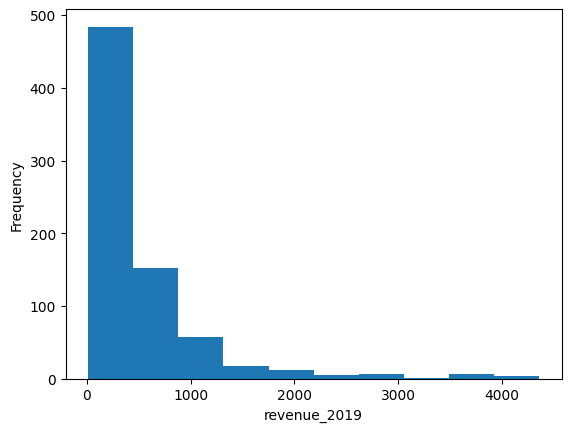

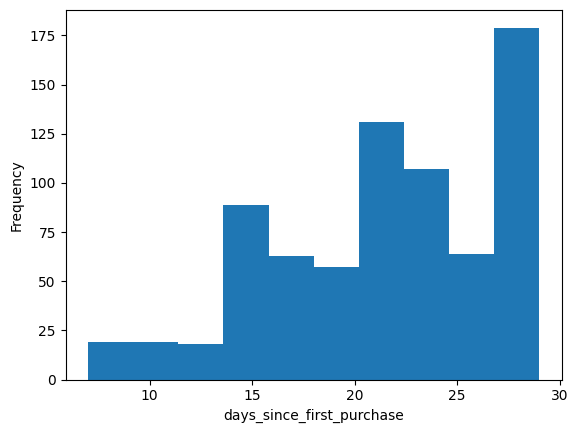

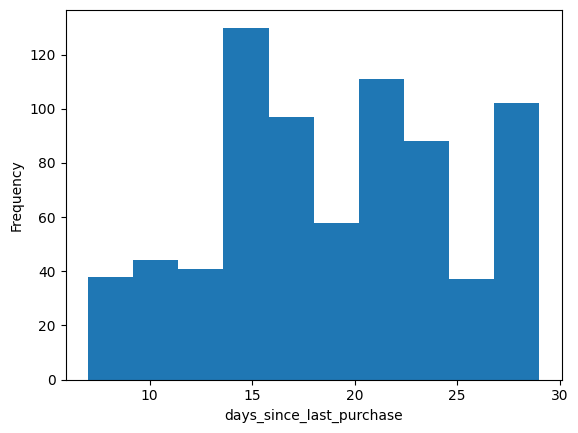

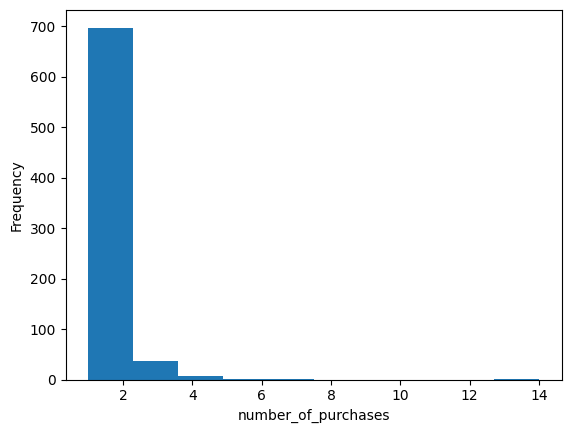

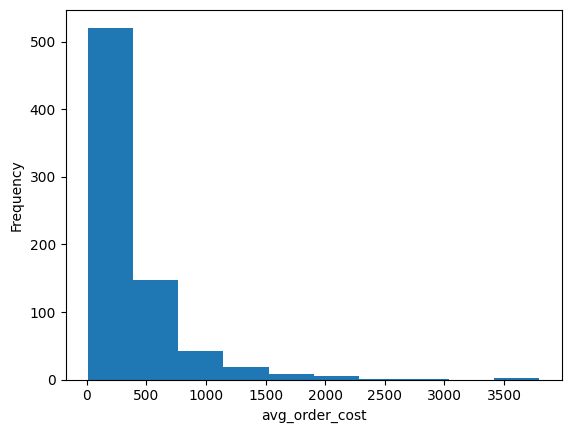

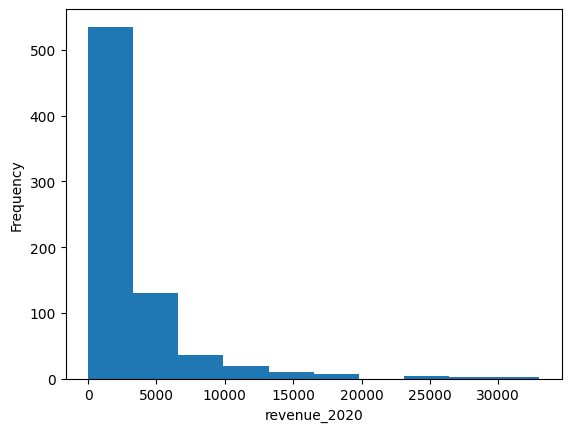

In [130]:
import matplotlib.pyplot as plt
for i in wrangled_df.columns:
    plt.hist(wrangled_df[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

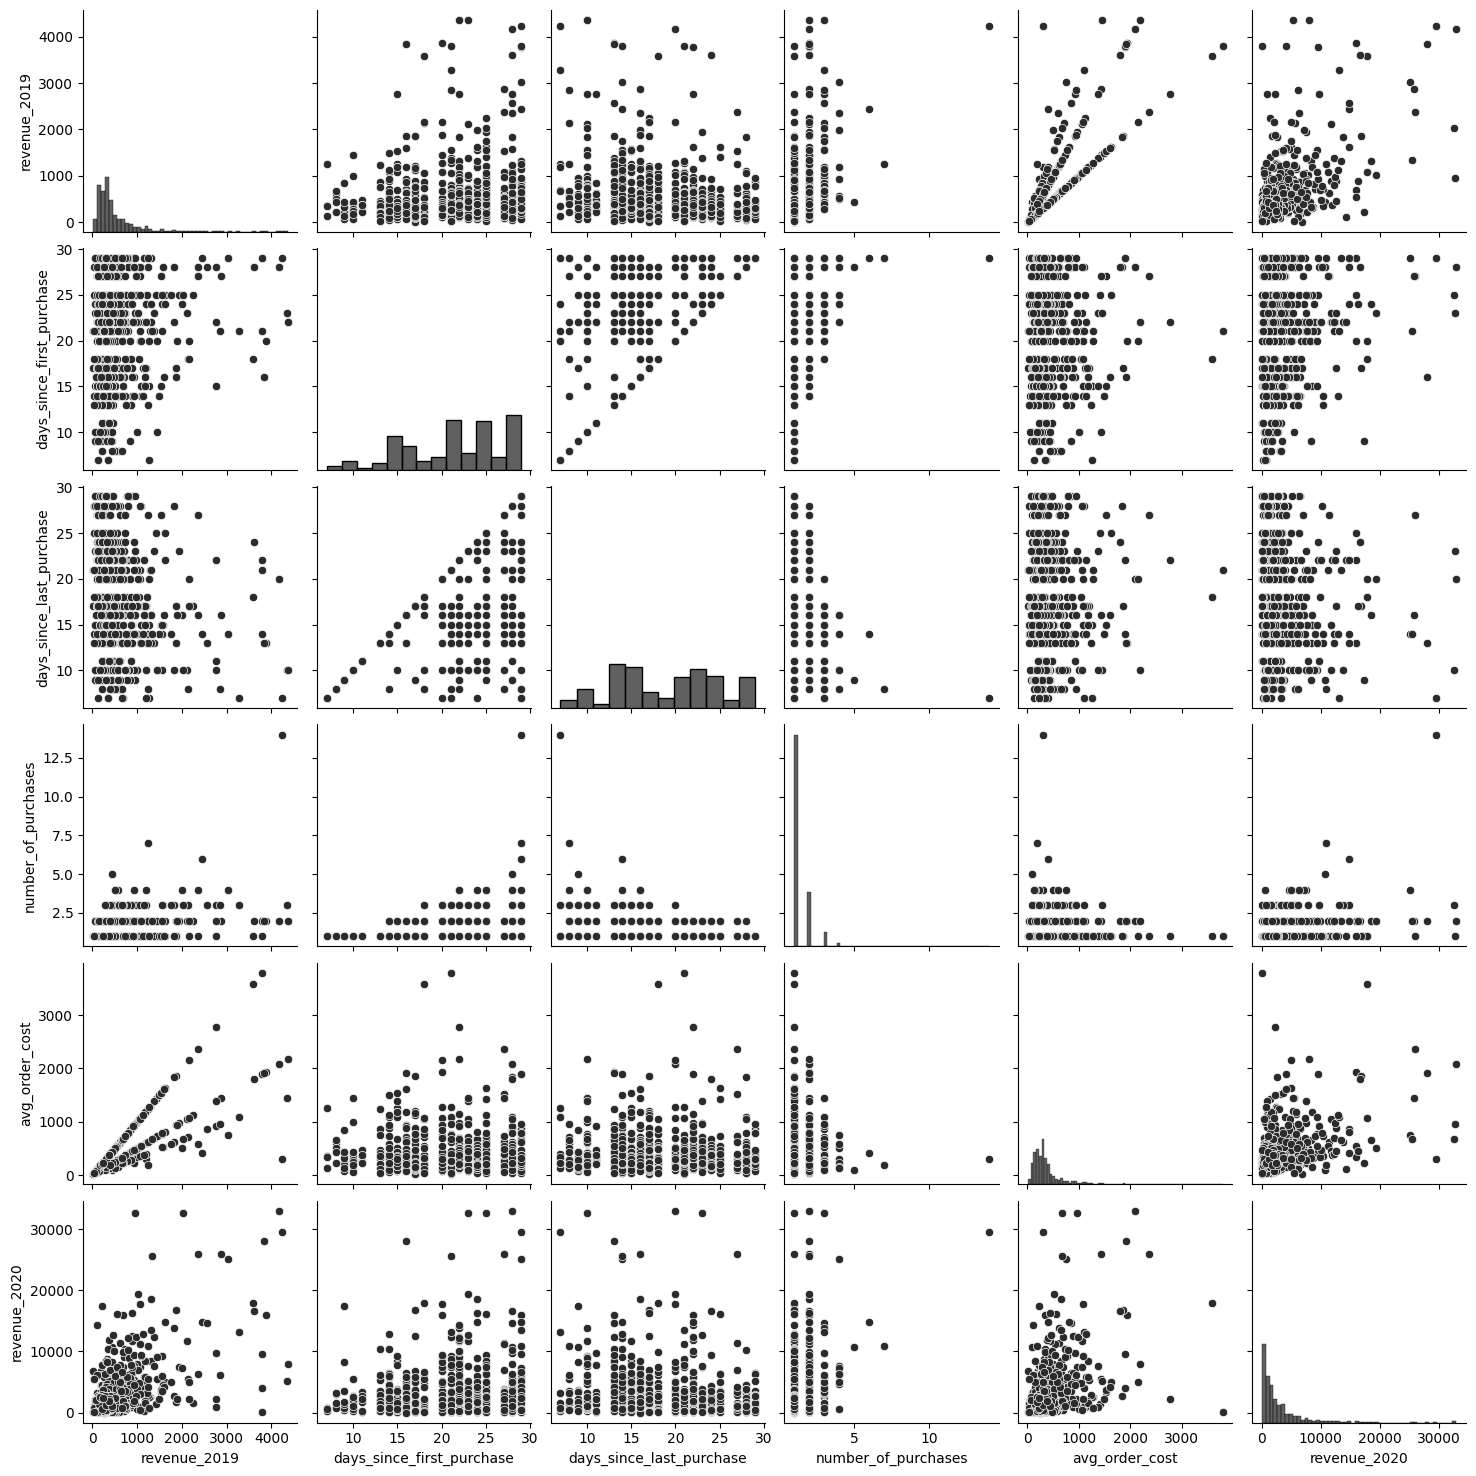

In [141]:
import seaborn as sns
sns.set_palette('Greys_r')
sns.pairplot(wrangled_df)
plt.show()

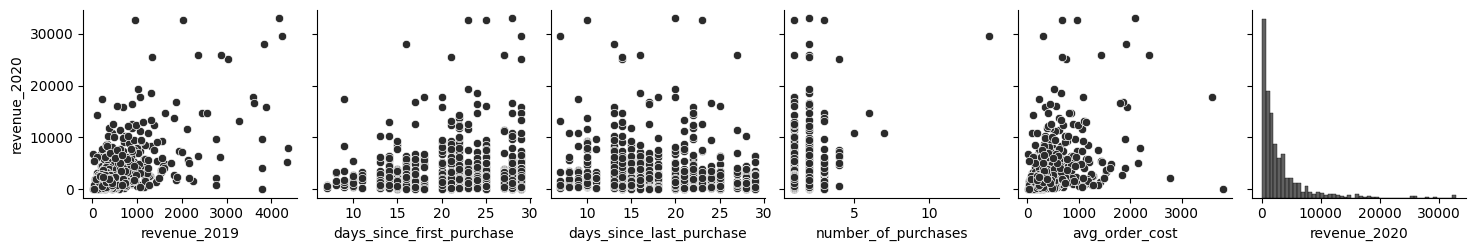

In [143]:
#Using the pairplot function and the y_vars parameter, limit the view to the row for your target variable, that is, revenue_2020
sns.pairplot(wrangled_df,x_vars=wrangled_df.columns,y_vars="revenue_2020")
plt.show()

In [132]:
wrangled_df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.108837,-0.234629,0.467450,0.815594,0.598361
days_since_first_purchase,0.108837,1.000000,0.635764,0.297175,-0.048815,0.076373
days_since_last_purchase,-0.234629,0.635764,1.000000,-0.373529,-0.061152,-0.165461
number_of_purchases,0.467450,0.297175,-0.373529,1.000000,0.009512,0.383715
avg_order_cost,0.815594,-0.048815,-0.061152,0.009512,1.000000,0.434781
revenue_2020,0.598361,0.076373,-0.165461,0.383715,0.434781,1.000000


In [139]:
import numpy as np
np.corrcoef(wrangled_df['avg_order_cost'],wrangled_df['revenue_2020'])

array([[1.        , 0.43478123],
       [0.43478123, 1.        ]])

# Exercise:  Examining relationship between store location and revenue

In [145]:
df=pd.read_csv('location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


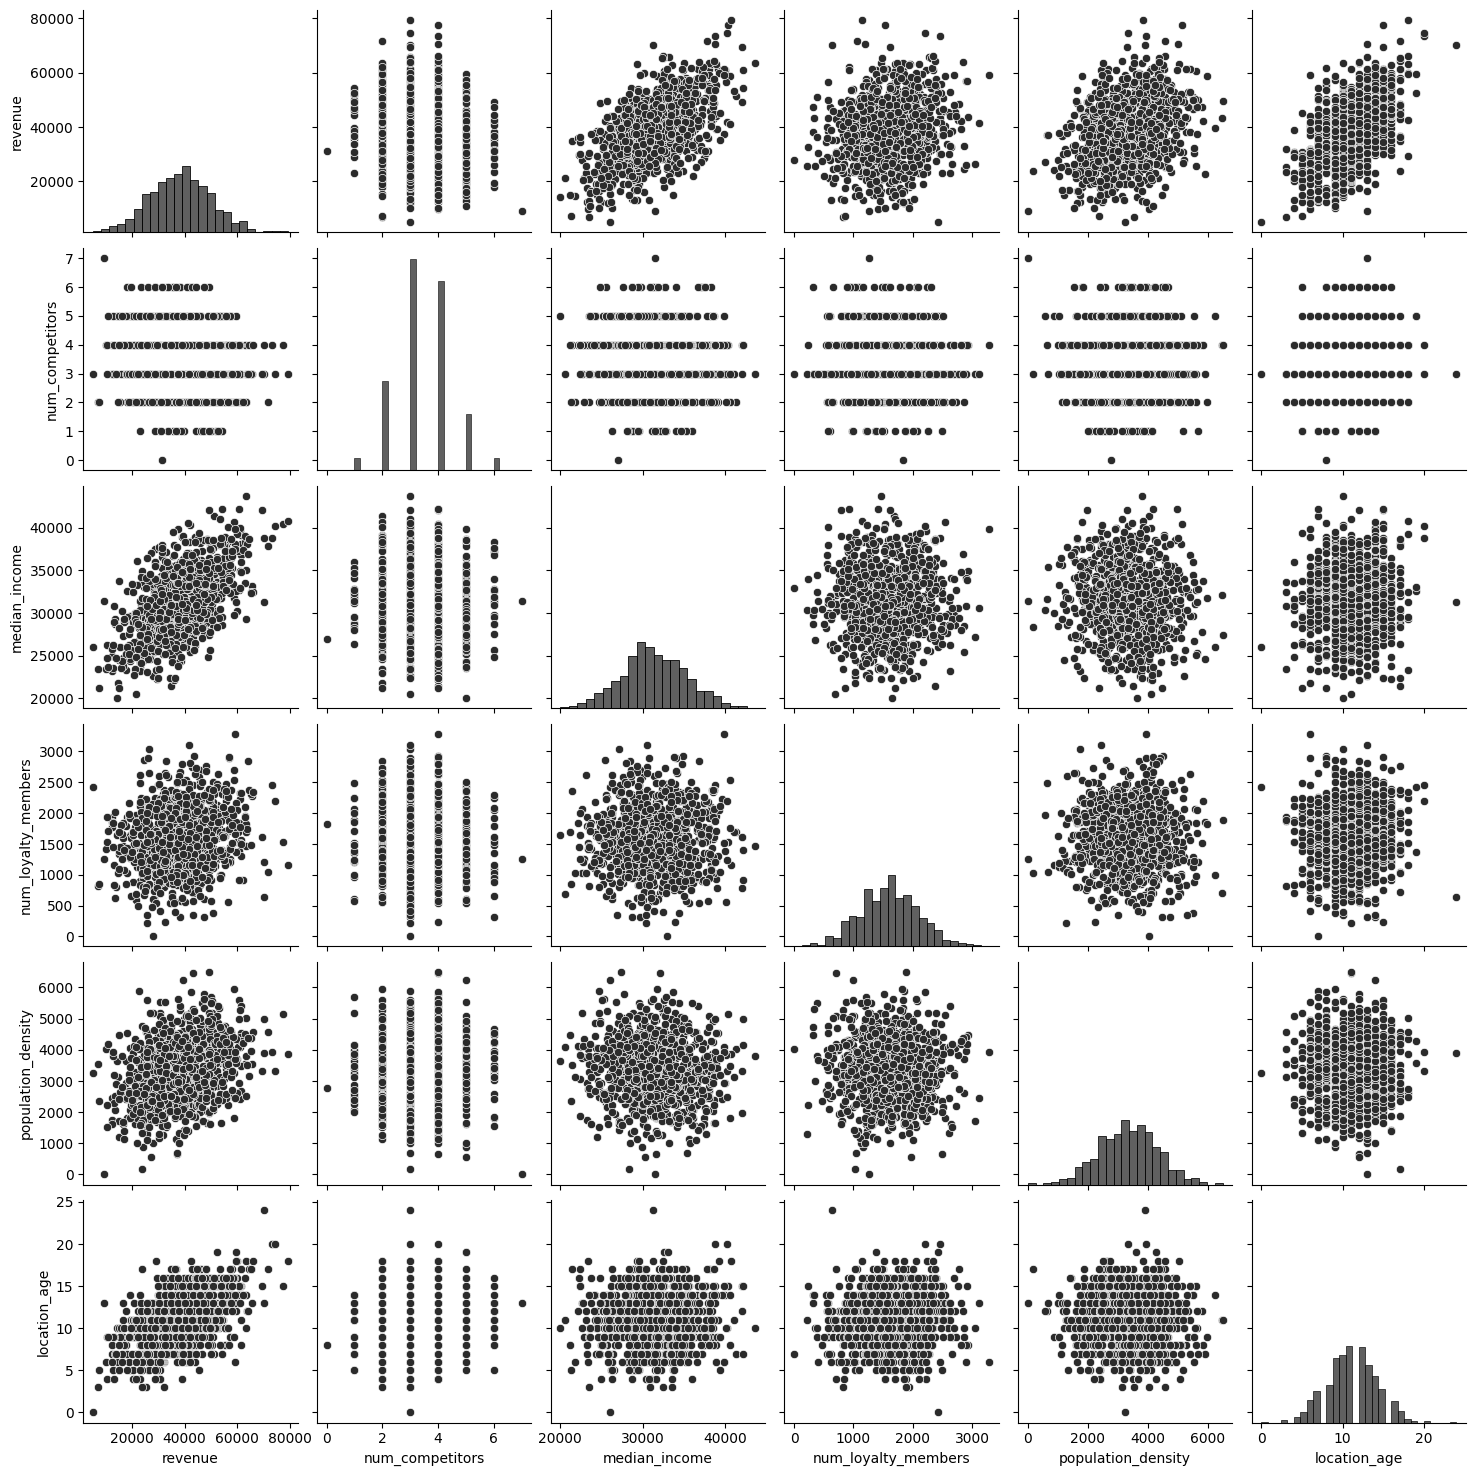

In [147]:
sns.pairplot(df)
plt.show()

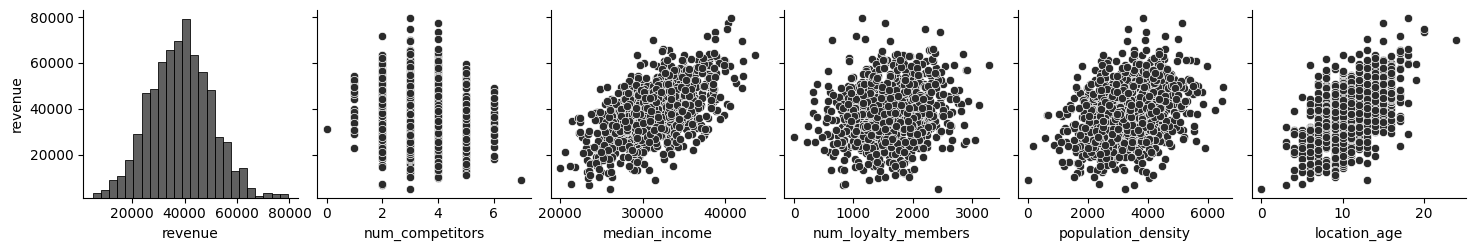

In [148]:
sns.pairplot(df,x_vars=df.columns,y_vars="revenue")
plt.show()

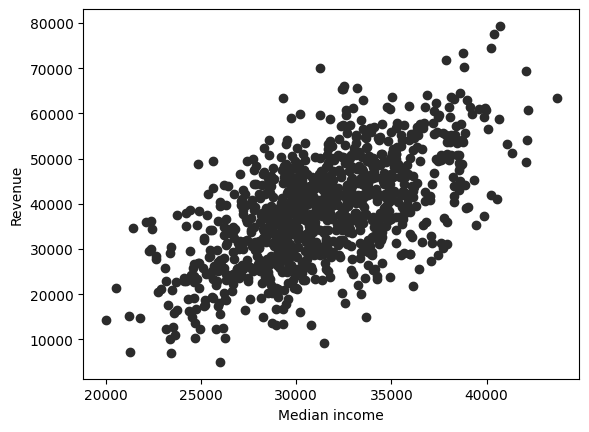

In [151]:
plt.scatter(df['median_income'],df['revenue'])
plt.xlabel("Median income")
plt.ylabel("Revenue")
plt.show()

In [152]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


Median income has the highest association with revenue and the association makes business sense. 